## Importing Python modules

In [25]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Math

In [99]:
# https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
# Hack:

import os
import sys

# Change directory to FYS5419 folder
os.chdir(os.path.expanduser("C:/Users/a504654/OneDrive - SpareBank 1 Alliansen/Dokumenter/UiO/FYS5419/"))

# Current directory
print(f'current directory: {os.getcwd()}')

# Directory of file
from ipykernel import get_connection_file

connection_file = get_connection_file()
notebook_path = os.path.dirname(connection_file)
print(f'path current notebook: {notebook_path}')

current directory: C:\Users\a504654\OneDrive - SpareBank 1 Alliansen\Dokumenter\UiO\FYS5419
path current notebook: C:\Users\a504654\AppData\Roaming\jupyter\runtime


# Useful information

## General

https://relate.cs.illinois.edu/course/cs450-f19/f/demos/upload/misc/An%20Introduction%20to%20Sympy.html

## Print

https://docs.sympy.org/latest/tutorials/intro-tutorial/printing.html#ascii-pretty-printer

https://stackoverflow.com/questions/20979993/how-to-pretty-print-in-ipython-notebook-via-sympy

## Plotting in SymPy

https://docs.sympy.org/latest/modules/plotting.html

### Plotting in matplotlib with the help of SymPy   

https://chemistryprogramming.xyz/2024/03/plots-with-sympy-and-matplotlib/

Some testing of sympy and matrices.

In [27]:
sp.Matrix([[1, -1], [3, 4], [0, 2]]);

In [28]:
M = sp.Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
display(M) # Use display instead of print to get nice display.
print(M.eigenvals())
# Egenverdien 5 er med multiplisitet 2

Matrix([
[3, -2,  4, -2],
[5,  3, -3, -2],
[5, -2,  2, -2],
[5, -2, -3,  3]])

{3: 1, -2: 1, 5: 2}


In [29]:
lamda = sp.Symbol('lamda')
p = M.charpoly(lamda)
sp.factor(p.as_expr())

(lamda - 5)**2*(lamda - 3)*(lamda + 2)

Start of Part B. 
Introducing matrices $H$, $H_0$ and $H_I$

In [30]:
# H11, H12, H21, H22 = sp.symbols('H11' 'H12' 'H21' 'H22')
# E1, E2 = sp.symbols('E1, E2')
# V11, V12, V21, V22 = sp.symbols('V11, V12, V21, V22')
H11, H12, H21, H22 = sp.Symbol('H11'), sp.Symbol('H12'), sp.Symbol('H21'), sp.Symbol('H22')
E1, E2 = sp.Symbol('E1'), sp.Symbol('E2')
V11, V12, V21, V22 = sp.symbols('V11, V12, V21, V22')

H = sp.Matrix([[H11, H12], [H21, H22]])
H0 = sp.Matrix([[E1, 0], [0, E2]])
HI = sp.Matrix([[V11, V12], [V21, V22]])

In [8]:
# display(HI)
# values={"V11":3,"V21":17}
# HI.subs(values)

In [31]:
# Use this for your imaginary symbol
# j = Symbol('j')
# Pauli matrices:

X = sp.Matrix([[0,1], [1,0]])
Y = sp.Matrix([[0,-1j], [1j,0]])
Z = sp.Matrix([[1,0], [0,-1]] )

display(Math(f'Y = {sp.latex(Y)}'))
display(Math(f'Y^2 = {sp.latex(sp.simplify(Y @ Y))}'))
# display(sp.simplify(Y @ Y))

display(Math(f'Z = {sp.latex(Z)}'))
display(Math(f'Z^2 = {sp.latex(sp.simplify(Z @ Z))}'))
# display(sp.simplify(Z @ Z))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Introducing more symbols: 

In [32]:
Eps, Omega, c = sp.symbols('Eps, Omega, c')

Eps=(E1+E2)/2;
Omega=(E1-E2)/2;

V21 = V12
c = (V11+V22)/2;
omegaz = (V11-V22)/2;
omegax = V12;

In [33]:
H = H0 + lamda*HI

display(Math(f'H = {sp.latex(H)}'))
display(Math(f'H_I = {sp.latex(HI)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# LaTeX print

In [10]:
sp.print_latex(HI)

\left[\begin{matrix}V_{11} & V_{12}\\V_{21} & V_{22}\end{matrix}\right]


In [11]:
# Just some testing
H0.subs(H11, 666)
E2 = 4
V11 = 3
V22 = -V11

# Slette?:
# H = MatrixSymbol('H', 2, 2)
# https://stackoverflow.com/questions/34996050/matrix-subs-in-sympy
H

Matrix([
[E1 + V11*lamda,      V12*lamda],
[     V21*lamda, E2 + V22*lamda]])

# Computation of eigenvalues and eigenvectors of H

In [50]:
values={"E1":0, "E2":4, "V11":3, "V22":-3, "V12":sp.Rational(1, 5), "V21":sp.Rational(1, 5)}
Hnew = H.subs(values)
display(Math(f'H = {sp.latex(Hnew)}'))
evals = Hnew.eigenvals()
evects = Hnew.eigenvects()
print(f'type(evals): {type(evals)}')

# display(evals)
# display(evects)

evals_values = list(evals.keys())
x1, x2 = evals_values[0], evals_values[1] 
display(Math(f'x_1 = {sp.latex(x1)}'))
display(Math(f'x_2 = {sp.latex(x2)}'))

sp.print_latex(x1)
# sp.print_latex(x2)
# sp.print_latex(Hnew)

print('\n' + 'eigenvectors:')
# display(evects)
display(Math(f'{sp.latex(evects)}'))

# https://stackoverflow.com/questions/43689076/how-to-find-the-eigenvalues-and-eigenvectors-of-a-matrix-with-sympy
v1, v2 = [list(tup[2][0]) for tup in evects]
print('\n')
display(Math(f'v_1 = {sp.latex(v1)}'))
sp.print_latex(v1)
print('\n\n')
display(Math(f'v_2 = {sp.latex(v2)}'))
sp.print_latex(v2)

<IPython.core.display.Math object>

type(evals): <class 'dict'>


<IPython.core.display.Math object>

<IPython.core.display.Math object>

- \frac{\sqrt{2} \sqrt{113 \lambda^{2} - 150 \lambda + 50}}{5} + 2

eigenvectors:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

\left[ \frac{15 \lambda - 20}{\lambda} + \frac{5 \left(- \frac{\sqrt{2} \sqrt{113 \lambda^{2} - 150 \lambda + 50}}{5} + 2\right)}{\lambda}, \  1\right]





<IPython.core.display.Math object>

\left[ \frac{15 \lambda - 20}{\lambda} + \frac{5 \left(\frac{\sqrt{2} \sqrt{113 \lambda^{2} - 150 \lambda + 50}}{5} + 2\right)}{\lambda}, \  1\right]


## Plotting of eigenvalues

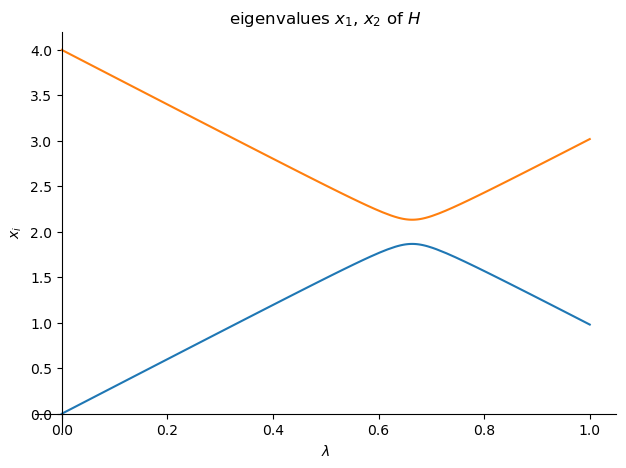

In [13]:
# Built in plotting functionality in SymPy:
p1 = sp.plot(x1, (lamda, 0, 1), show=False, title = 'eigenvalues ' 
             + r'$x_1$, $x_2$' + ' of ' + r'$H$', 
            ylabel = r'$x_i$')
p2 = sp.plot(x2, (lamda, 0, 1), show=False)
p1.append(p2[0])
p1.show()

array([[ 0.   ,  0.017,  0.031, ...,  0.97 ,  0.984,  1.   ],
       [-0.   ,  0.051,  0.094, ...,  1.07 ,  1.027,  0.98 ]])

96 96


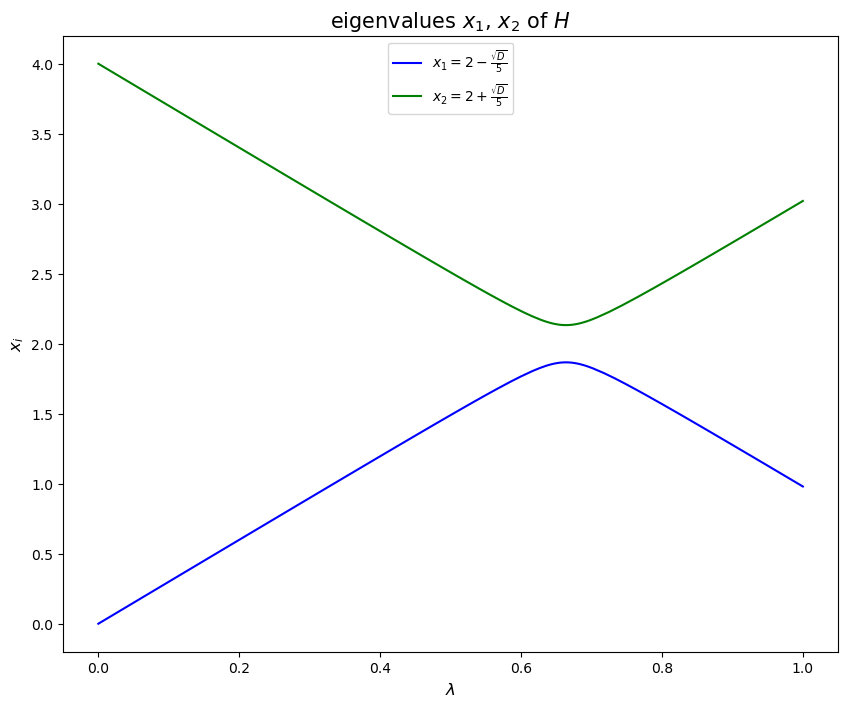

In [60]:
# https://chemistryprogramming.xyz/2024/03/plots-with-sympy-and-matplotlib/
# Using plotting functionality from matplotlib to plot SymPy output:
p1 = sp.plot(x1, (lamda, 0, 1), show=False)
p2 = sp.plot(x2, (lamda, 0, 1), show=False)

# Just to get familiar with the object p1:
type(p1[0])
[x for x in dir(p1) if not x.startswith('_')];
with np.printoptions(threshold=10, precision=3, suppress=True):
    display(np.array(p1[0].get_points()))
print(len(p1[0].get_points()[0]), len(p1[0].get_points()[1]))

# Fetching the SymPy data:
data = p1[0].get_points()
data2 = p2[0].get_points()

# fig, ax = plt.subplots(figsize=(10, 8), facecolor=(1, 1, 1))
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.set_xlabel(r"$\lambda$", fontsize = 12) 
ax.set_ylabel(r'$x_i$', fontsize = 12)
ax.plot(*data, color='blue', label=r'$x_1 = 2 - \frac{\sqrt{D}}{5}$')  # unpacking the data
ax.plot(*data2, color='green', label=r'$x_2 = 2 + \frac{\sqrt{D}}{5}$' )
ax.set_title('eigenvalues ' + r'$x_1$, $x_2$' + ' of ' + r'$H$', fontsize = 15)
# filsti = r'C:\Users\a504654\OneDrive - SpareBank 1 Alliansen\Dokumenter\UiO\FYS5419'
plt.legend(loc="upper center")
plt.savefig('partB_eigenvalues.png')
plt.show()

## Computations of some special values

In [61]:
# lamda = 1
display(x1.subs(lamda, 1))
display(x2.subs(lamda, 1))
print(f'x1 = {sp.N(x1.subs(lamda, 1), 5)}')
print(f'x2 = {sp.N(x2.subs(lamda, 1), 5)}')
# LaTeX:
print(sp.latex(x1.subs(lamda, 1)))
print(sp.latex(x2.subs(lamda, 1)))

# lamda = 2/3
display(x1.subs(lamda, sp.Rational(2, 3)))
display(x2.subs(lamda, sp.Rational(2, 3)))
print(f'28/15 = {28/15}')
print(f'32/15 = {32/15}')

2 - sqrt(26)/5

sqrt(26)/5 + 2

x1 = 0.98020
x2 = 3.0198
2 - \frac{\sqrt{26}}{5}
\frac{\sqrt{26}}{5} + 2


28/15

32/15

28/15 = 1.8666666666666667
32/15 = 2.1333333333333333


AttributeError: 'list' object has no attribute 'subs'

## Plotting of eigenvectors

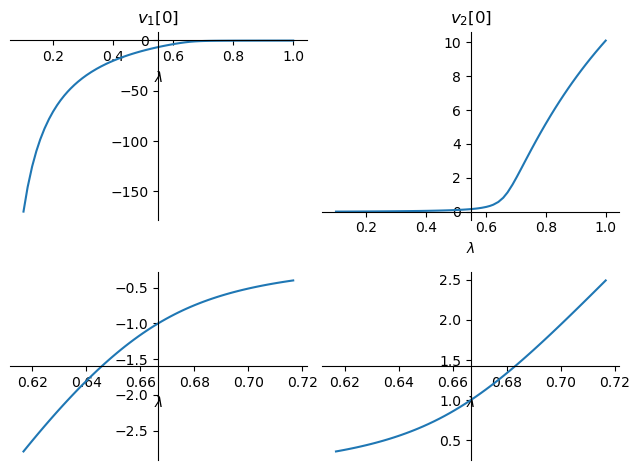

In [15]:
# Using built in plot functionality in SymPy:
p1 = sp.plot(v1[0], (lamda, 0.1, 1), show=False, title = r'$v_1[0]$', ylabel = None)  #ylabel = r'$v_1[0]$')
p2 = sp.plot(v2[0], (lamda, 0.1, 1), show=False, title = r'$v_2[0]$', ylabel = None) #ylabel = r'$v_2[0]$')
p3 = sp.plot(v1[0], (lamda, 2/3-0.05, 2/3+0.05), show=False, ylabel = None)
p4 = sp.plot(v2[0], (lamda, 2/3-0.05, 2/3+0.05), show=False, ylabel = None) 
# p1.append(p2[0])
# p1.show()
from sympy.plotting import plot, plot3d, PlotGrid
PlotGrid(2, 2, p1, p2, p3, p4)
# PlotGrid(1, 2, p1, p2)
# title = 'eigenvectors ' + r'$v_1$, $v_2$' + ' of ' + r'$H$'

C:\Users\a504654\AppData\Local\Temp\ipykernel_45428\3794577783.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


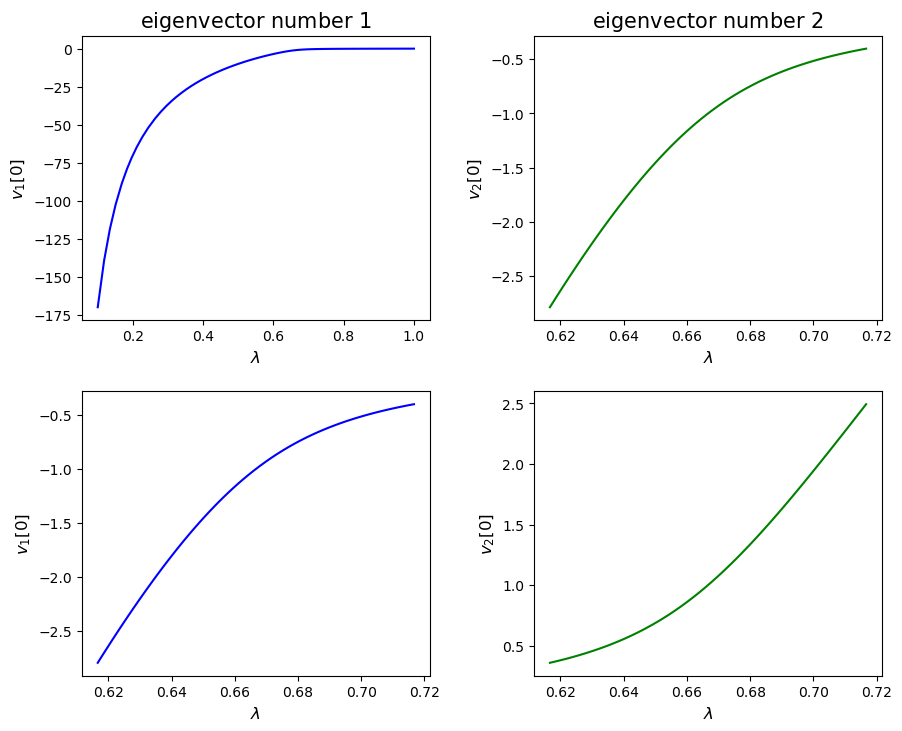

In [32]:
# Using plotting functionality from matplotlib to plot SymPy output:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

data1 = p1[0].get_points()
data2 = p2[0].get_points()
data3 = p3[0].get_points()
data4 = p4[0].get_points()

axs[0,0].plot(*data1, color='blue')
axs[0,0].set_xlabel(r"$\lambda$", fontsize = 12) 
axs[0,0].set_ylabel(r'$v_1[0]$', fontsize = 12)
axs[0,0].set_title('eigenvector number ' + r'$1$', fontsize = 15)

axs[1,0].plot(*data3, color='blue')
axs[1,0].set_xlabel(r"$\lambda$", fontsize = 12) 
axs[1,0].set_ylabel(r'$v_1[0]$', fontsize = 12)

axs[0,1].plot(*data3, color='green')
axs[0,1].set_xlabel(r"$\lambda$", fontsize = 12) 
axs[0,1].set_ylabel(r'$v_2[0]$', fontsize = 12)
axs[0,1].set_title('eigenvector number ' + r'$2$', fontsize = 15)

axs[1,1].plot(*data4, color='green')
axs[1,1].set_xlabel(r"$\lambda$", fontsize = 12) 
axs[1,1].set_ylabel(r'$v_2[0]$', fontsize = 12)

# fig.tight_layout(pad=5.0)
# plt.subplot_tool()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.25)
fig.savefig('partB_eigenvectors_graf_2.png')
fig.show()

## Computations of some special values

In [81]:
# Eigenvectors
display(Math(f'v_1 = {sp.latex(v1)}'))
display(Math(f'v_1 = {[e.subs(lamda, sp.Rational(2, 3)) for e in v1]}'))

for v in [1/10, 1/2, 2/3]:
    print(sp.N(v1[0].subs(lamda,v), 3))

# for verdier in np.arange(0.1, 0.9, 0.1):
#     display(Math(f'v_1 = {[e.subs(lamda, verdier) for e in v1]}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-170.
-10.1
-1.00


In [68]:
print(sp.limit(v1[0],lamda,0))
print(sp.limit(v2[0],lamda,0))


print(v1[0].subs(lamda, sp.Rational(2, 3)))
print(v2[0].subs(lamda, sp.Rational(2, 3)))

print(f'{v1[0].subs(lamda, 1)} = {sp.N(v1[0].subs(lamda, 1), 2)}')
print(f'{v2[0].subs(lamda, 1)} = {sp.N(v2[0].subs(lamda, 1), 2)}')

-oo
0
-1
1
5 - sqrt(26) = -0.099
5 + sqrt(26) = 10
